# CO2 Emissions Prediction Project and Application of Supervised Learning Models


In this capstone project, I used data from the EPA in order to build a number of models to make a number of predictions about COAL plants and Gas Plants and their CO2 and CH4 emissions given the plant type.  For COAL plants, I ran some additional regressions to predict CO2 emissions given different coal types and given metrics from the plant.   

In [1]:
#First step is to install the same modules as I used for the Wine Data Projects, because I will use the same techniques.

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
import statsmodels.api as sm # What does this do? Find out and type here.
from statsmodels.graphics.api import abline_plot # What does this do? Find out and type here.
from sklearn.metrics import mean_squared_error, r2_score # What does this do? Find out and type here.
from sklearn.model_selection import train_test_split #  What does this do? Find out and type here.
from sklearn import linear_model, preprocessing # What does this do? Find out and type here.
import warnings # For handling error messages.
# Don't worry about the following two instructions: they just suppress warnings that could occur later. 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

# Chapter One:  Additional Data Wrangling.  

After I did my first step of Data Wrangling, I needed to do more Data Wrangling in order to further refine my dataset.  The exploratory data analysis stage immediately showed me this, and that really to do this analysis, I had to exclude renewables from my dataase.

In [2]:
#Then I will import the revised file after my DataWrangling into a dataframe.
df = pd.read_csv('CO2_Prediction_After_Wrangling.csv')

In [3]:
df.head()

,Data Year,Plant state abbreviation,Utility name,Plant name,Plant-level sector,Balancing Authority Name,eGRID subregion name,Plant latitude,Plant longitude,Number of units,...,Plant annual CO2 emissions (tons),Plant annual CH4 emissions (lbs),Plant annual CO2 total output emission rate (lb/MWh),Plant annual CH4 total output emission rate (lb/MWh),Plant unadjusted annual heat input from combustion (MMBtu),Plant nominal heat rate (Btu/kWh),Plant annual total nonrenewables net generation (MWh),Plant annual total renewables net generation (MWh),Plant total nonrenewables generation percent (resource mix),Plant total renewables generation percent (resource mix)
0,2018,AK,"Alaska Village Elec Coop, Inc",Alakanuk,Electric Utility,Alaska Miscellaneous,ASCC Miscellaneous,62.683300,-164.654400,5,...,0.000,0.000,0.000,0.000,NaN,NaN,0.0,0.0,0.0,0.0
1,2018,AK,"Copper Valley Elec Assn, Inc",Allison Creek Hydro,Electric Utility,Alaska Miscellaneous,ASCC Miscellaneous,61.084444,-146.353333,1,...,0.000,0.000,0.000,0.000,NaN,NaN,0.0,23077.0,0.0,1.0
2,2018,AK,"Alaska Village Elec Coop, Inc",Ambler,Electric Utility,Alaska Miscellaneous,ASCC Miscellaneous,67.087980,-157.856719,3,...,996.124,80.676,1651.948,0.067,12197.999,10114.427032,1206.0,0.0,1.0,0.0
3,2018,AK,Anchorage Municipal Light and Power,Anchorage 1,Electric Utility,Anchorage Municipal Light & Power,ASCC Alaska Grid,61.222100,-149.866100,8,...,22650.454,859.171,1565.501,0.030,387517.000,13391.747590,28937.0,0.0,1.0,0.0
4,2018,AK,"Inside Passage Elec Coop, Inc",Angoon,Electric Utility,Alaska Miscellaneous,ASCC Miscellaneous,57.499166,-134.586140,4,...,1432.692,116.034,1733.445,0.070,17544.000,10613.430127,1653.0,0.0,1.0,0.0


In [4]:
df.shape

(9123, 28)

In [5]:
df.dtypes

Data Year                                                                int64
Plant state abbreviation                                                object
Utility name                                                            object
Plant name                                                              object
Plant-level sector                                                      object
Balancing Authority Name                                                object
eGRID subregion name                                                    object
Plant latitude                                                         float64
Plant longitude                                                        float64
Number of units                                                          int64
Number of generators                                                     int64
Plant primary fuel                                                      object
Plant primary coal/oil/gas/ other fossil fuel catego

In [6]:
#Now I'm curious about the composition of the Plant annual CO2 emmissions (tons) column.  This is going to be our independent variable.
df['Plant annual CO2 emissions (tons)'].value_counts()



0.000          6052
0.001            60
0.002            19
0.003             7
4.573             5
               ... 
2814.864          1
247811.700        1
1561998.200       1
860180.300        1
118503.720        1
Name: Plant annual CO2 emissions (tons), Length: 2949, dtype: int64

In [7]:
# Get a basic statistical summary of the variable 
print(df['Plant annual CO2 emissions (tons)'].describe)

print(df['Plant annual CO2 emissions (tons)'].mean())

print(df['Plant annual CO2 emissions (tons)'].std())

print(df['Plant annual CO2 emissions (tons)'].max())



<bound method NDFrame.describe of 0             0.000
1             0.000
2           996.124
3         22650.454
4          1432.692
           ...     
9118       2139.344
9119     830991.800
9120     982289.900
9121    1062853.800
9122    2988233.100
Name: Plant annual CO2 emissions (tons), Length: 9123, dtype: float64>
215894.06090485587
1134127.309376531
20155730.7


In [8]:
#I'm goinng to try to transform this data so that it is easier to map.

df['Ann CO2 Emissions Million Tons'] = round(df['Plant annual CO2 emissions (tons)'] / 1000000, 2)

df.head()

,Data Year,Plant state abbreviation,Utility name,Plant name,Plant-level sector,Balancing Authority Name,eGRID subregion name,Plant latitude,Plant longitude,Number of units,...,Plant annual CH4 emissions (lbs),Plant annual CO2 total output emission rate (lb/MWh),Plant annual CH4 total output emission rate (lb/MWh),Plant unadjusted annual heat input from combustion (MMBtu),Plant nominal heat rate (Btu/kWh),Plant annual total nonrenewables net generation (MWh),Plant annual total renewables net generation (MWh),Plant total nonrenewables generation percent (resource mix),Plant total renewables generation percent (resource mix),Ann CO2 Emissions Million Tons
0,2018,AK,"Alaska Village Elec Coop, Inc",Alakanuk,Electric Utility,Alaska Miscellaneous,ASCC Miscellaneous,62.683300,-164.654400,5,...,0.000,0.000,0.000,NaN,NaN,0.0,0.0,0.0,0.0,0.00
1,2018,AK,"Copper Valley Elec Assn, Inc",Allison Creek Hydro,Electric Utility,Alaska Miscellaneous,ASCC Miscellaneous,61.084444,-146.353333,1,...,0.000,0.000,0.000,NaN,NaN,0.0,23077.0,0.0,1.0,0.00
2,2018,AK,"Alaska Village Elec Coop, Inc",Ambler,Electric Utility,Alaska Miscellaneous,ASCC Miscellaneous,67.087980,-157.856719,3,...,80.676,1651.948,0.067,12197.999,10114.427032,1206.0,0.0,1.0,0.0,0.00
3,2018,AK,Anchorage Municipal Light and Power,Anchorage 1,Electric Utility,Anchorage Municipal Light & Power,ASCC Alaska Grid,61.222100,-149.866100,8,...,859.171,1565.501,0.030,387517.000,13391.747590,28937.0,0.0,1.0,0.0,0.02
4,2018,AK,"Inside Passage Elec Coop, Inc",Angoon,Electric Utility,Alaska Miscellaneous,ASCC Miscellaneous,57.499166,-134.586140,4,...,116.034,1733.445,0.070,17544.000,10613.430127,1653.0,0.0,1.0,0.0,0.00


(array([8.586e+03, 1.640e+02, 1.160e+02, 5.800e+01, 4.200e+01, 2.200e+01,
        1.700e+01, 1.000e+01, 2.300e+01, 1.400e+01, 6.000e+00, 1.300e+01,
        1.100e+01, 6.000e+00, 1.000e+00, 8.000e+00, 3.000e+00, 4.000e+00,
        2.000e+00, 5.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 2.000e+00,
        2.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.   ,  0.672,  1.344,  2.016,  2.688,  3.36 ,  4.032,  4.704,
         5.376,  6.048,  6.72 ,  7.392,  8.064,  8.736,  9.408, 10.08 ,
        10.752, 11.424, 12.096, 12.768, 13.44 , 14.112, 14.784, 15.456,
        16.128, 16.8  , 17.472, 18.144, 18.816, 19.488, 20.16 ]),
 <a list of 30 Patch objects>)

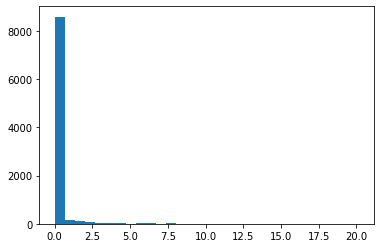

In [9]:
plt.hist(df['Ann CO2 Emissions Million Tons'], bins=30)

In [10]:
#I would like to get a better idea of the plants with significant CO2 pollution.   How about the ones that are above 5 million tons a year

Dfmorethan5tons = df[df['Ann CO2 Emissions Million Tons'] >= 5]

Dflessthan5tons = df[df['Ann CO2 Emissions Million Tons'] <= 5]


(array([13., 18., 14.,  3.,  4., 13.,  7.,  6.,  4.,  1.,  4.,  6.,  1.,
         4.,  1.,  2.,  4.,  1.,  1.,  1.,  1.,  2.,  2.,  0.,  0.,  2.,
         1.,  0.,  0.,  1.]),
 array([ 5.01 ,  5.515,  6.02 ,  6.525,  7.03 ,  7.535,  8.04 ,  8.545,
         9.05 ,  9.555, 10.06 , 10.565, 11.07 , 11.575, 12.08 , 12.585,
        13.09 , 13.595, 14.1  , 14.605, 15.11 , 15.615, 16.12 , 16.625,
        17.13 , 17.635, 18.14 , 18.645, 19.15 , 19.655, 20.16 ]),
 <a list of 30 Patch objects>)

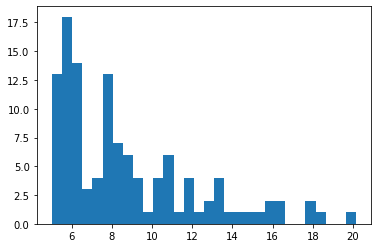

In [11]:
plt.hist(Dfmorethan5tons['Ann CO2 Emissions Million Tons'], bins = 30)

(array([8.515e+03, 1.630e+02, 9.300e+01, 9.300e+01, 4.200e+01, 4.000e+01,
        2.300e+01, 1.400e+01, 1.500e+01, 8.000e+00]),
 array([0.   , 0.496, 0.992, 1.488, 1.984, 2.48 , 2.976, 3.472, 3.968,
        4.464, 4.96 ]),
 <a list of 10 Patch objects>)

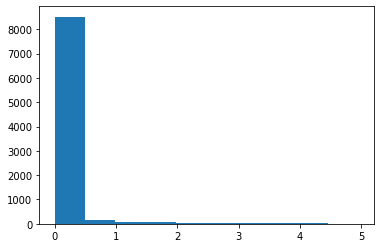

In [12]:
plt.hist(Dflessthan5tons['Ann CO2 Emissions Million Tons'])

(array([8.866e+03, 1.210e+02, 5.100e+01, 3.300e+01, 1.800e+01, 1.500e+01,
        8.000e+00, 5.000e+00, 4.000e+00, 2.000e+00]),
 array([-0.19037183,  1.58692736,  3.36422654,  5.14152573,  6.91882492,
         8.69612411, 10.47342329, 12.25072248, 14.02802167, 15.80532086,
        17.58262004]),
 <a list of 10 Patch objects>)

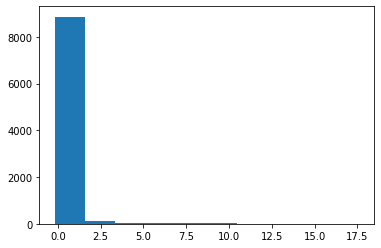

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data = df[['Plant annual CO2 emissions (tons)']]

scaler.fit(data)

data_scaled = scaler.transform(data)

plt.hist(data_scaled)

In [14]:
#Looks like there are mostly plants that don't emit alot.  There are only a few that have really large emissions.
#How many plants are there in each state?

df['Plant state abbreviation'].value_counts()

CA    1390
NC     677
NY     476
TX     459
MN     451
MA     402
NJ     281
IA     249
MI     232
PA     223
IL     202
WI     191
OR     190
CO     190
FL     175
OH     173
GA     158
IN     156
VA     153
AK     143
KS     141
ID     138
WA     137
SC     134
AZ     128
MO     125
MD     114
CT     114
OK     110
NE     108
NM     107
UT     103
ME      99
VT      94
NV      83
LA      78
AL      77
TN      72
WY      63
MT      60
NH      59
HI      58
AR      58
ND      55
KY      51
MS      43
RI      43
SD      36
WV      34
DE      28
DC       2
Name: Plant state abbreviation, dtype: int64

In [15]:
#Which states are the worst emitors?

statetotals = df.groupby('Plant state abbreviation')['Ann CO2 Emissions Million Tons'].sum()

print(statetotals)

Plant state abbreviation
AK      2.73
AL     61.88
AR     41.18
AZ     53.98
CA     40.96
CO     37.71
CT      9.98
DC      0.02
DE      2.80
FL    114.81
GA     59.40
HI      7.41
IA     33.78
ID      1.46
IL     76.43
IN     98.52
KS     25.54
KY     71.82
LA     40.45
MA      9.81
MD     18.28
ME      1.46
MI     64.12
MN     30.53
MO     69.09
MS     29.08
MT     16.30
NC     53.61
ND     32.08
NE     25.99
NH      2.55
NJ     18.72
NM     21.66
NV     14.76
NY     27.59
OH     83.37
OK     38.38
OR     10.00
PA     84.40
RI      3.63
SC     31.30
SD      3.27
TN     30.31
TX    231.59
UT     31.46
VA     34.95
VT      0.04
WA     11.61
WI     45.62
WV     65.42
WY     47.23
Name: Ann CO2 Emissions Million Tons, dtype: float64


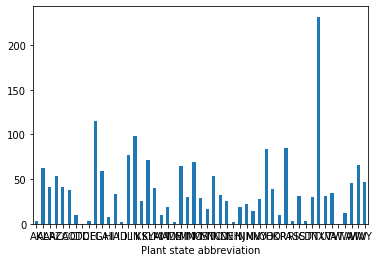

In [16]:
#That's interesting.  I want to see a bar chart of these totals.

statetotals.plot.bar(x='Plant state abbreviation', y='Ann CO2 Emissions Million Tons', rot=0)

(array([0.000e+00, 4.799e+03, 0.000e+00, 1.538e+03, 9.020e+02, 0.000e+00,
        6.530e+02, 3.480e+02, 0.000e+00, 2.630e+02, 1.480e+02, 0.000e+00,
        1.520e+02, 6.600e+01, 0.000e+00, 5.700e+01, 3.500e+01, 0.000e+00,
        5.800e+01, 1.600e+01, 0.000e+00, 1.200e+01, 1.000e+01, 0.000e+00,
        1.200e+01, 4.000e+00, 0.000e+00, 1.000e+01, 3.000e+00, 5.000e+00]),
 array([ 0.        ,  0.66666667,  1.33333333,  2.        ,  2.66666667,
         3.33333333,  4.        ,  4.66666667,  5.33333333,  6.        ,
         6.66666667,  7.33333333,  8.        ,  8.66666667,  9.33333333,
        10.        , 10.66666667, 11.33333333, 12.        , 12.66666667,
        13.33333333, 14.        , 14.66666667, 15.33333333, 16.        ,
        16.66666667, 17.33333333, 18.        , 18.66666667, 19.33333333,
        20.        ]),
 <a list of 30 Patch objects>)

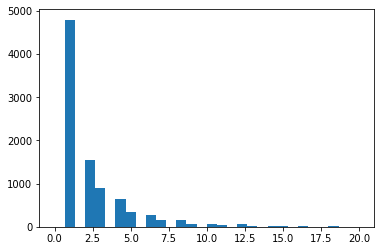

In [17]:
#Now I will explore number of units
plt.hist(df['Number of units'], bins = 30, range=[0,20])

In [18]:
#Let's do a value_counts() on units

df['Number of units'].value_counts()

1     4799
2     1538
3      902
4      653
5      348
6      263
8      152
7      148
9       66
12      58
10      57
11      35
13      16
14      12
16      12
18      10
15      10
20       5
48       4
17       4
21       4
22       4
24       3
19       3
36       3
27       2
32       2
31       2
34       1
73       1
41       1
33       1
23       1
35       1
28       1
29       1
Name: Number of units, dtype: int64

In [19]:
#Now I want to see by category how these values shake out.
df.groupby('Plant primary coal/oil/gas/ other fossil fuel category')['Ann CO2 Emissions Million Tons'].count()

Plant primary coal/oil/gas/ other fossil fuel category
BIOMASS        710
COAL           345
GAS           1708
GEOTHERMAL      64
HYDRO         1448
NUCLEAR         61
OFSL            19
OIL            819
OTHF           127
SOLAR         2719
WIND          1103
Name: Ann CO2 Emissions Million Tons, dtype: int64

In [20]:
df.groupby('Plant primary coal/oil/gas/ other fossil fuel category')['Ann CO2 Emissions Million Tons'].sum()

Plant primary coal/oil/gas/ other fossil fuel category
BIOMASS         17.38
COAL          1301.56
GAS            623.22
GEOTHERMAL       1.20
HYDRO            0.00
NUCLEAR          2.50
OFSL             4.18
OIL             15.70
OTHF             3.25
SOLAR            0.08
WIND             0.00
Name: Ann CO2 Emissions Million Tons, dtype: float64

In [21]:
#It's clear from these numbers that I should really only be looking at coal and gas emissions.   I'm going to make a new dataframe that is just Coal and Gas.  Also only the plants that have energy production (MWh) greater than 0.

dfCOAL = df[df['Plant primary coal/oil/gas/ other fossil fuel category']=='COAL']
dfGAS = df[df['Plant primary coal/oil/gas/ other fossil fuel category']=='GAS']

df = dfCOAL.append(dfGAS)

df = df[df['Plant annual net generation (MWh)']>0]


In [22]:
#I'm just going to get rid of anything where the plant had any renewable generation at all.

df = df[df['Plant total renewables generation percent (resource mix)']==0]

In [23]:
#I should have done this from the beginning.  Now I will restart exploratory analysis

df.shape

(1860, 29)

# Chapter 2:  Exploratory Data Analysis

After discovering that I needed to get rid of my renewables data before really analyzing CO2 Emissions, I started Exploratory Data Analysis all over again-This time only looking at Natural Gas and Coal Plants.   You can see my research where I looked at both of these types of plant by State, then the CO2 Emissions by State.  Finally I started looking at the Plant Annual MWh generation statistics.

In [24]:
df.dtypes

Data Year                                                                int64
Plant state abbreviation                                                object
Utility name                                                            object
Plant name                                                              object
Plant-level sector                                                      object
Balancing Authority Name                                                object
eGRID subregion name                                                    object
Plant latitude                                                         float64
Plant longitude                                                        float64
Number of units                                                          int64
Number of generators                                                     int64
Plant primary fuel                                                      object
Plant primary coal/oil/gas/ other fossil fuel catego

In [25]:
df['Plant state abbreviation'].value_counts()

CA    257
TX    175
NY     88
IL     81
PA     76
MI     66
FL     65
OH     54
KS     52
LA     48
IN     45
NJ     43
MO     40
CT     40
WI     40
IA     39
MN     34
CO     34
VA     34
NE     34
MA     33
AZ     31
OK     31
GA     31
MS     27
AL     27
NC     26
UT     26
MD     23
AR     22
SC     22
KY     21
NM     20
WY     19
WA     17
NV     17
AK     16
TN     15
WV     14
OR     13
MT     11
ND      9
RI      9
ID      8
SD      8
DE      7
ME      6
NH      4
DC      1
HI      1
Name: Plant state abbreviation, dtype: int64

In [26]:
bystate = df.groupby('Plant state abbreviation')['Ann CO2 Emissions Million Tons'].sum()
print(bystate)


Plant state abbreviation
AK      2.17
AL     61.27
AR     41.05
AZ     43.11
CA     36.94
CO     37.71
CT      8.88
DC      0.02
DE      0.95
FL     92.28
GA     58.89
HI      1.55
IA     33.08
ID      1.45
IL     76.42
IN     97.53
KS     25.54
KY     69.00
LA     38.46
MA      8.06
MD     17.76
ME      0.89
MI     63.10
MN     28.98
MO     67.43
MS     28.71
MT     15.91
NC     53.05
ND     32.06
NE     25.88
NH      2.03
NJ     17.41
NM     21.63
NV     14.51
NY     23.57
OH     81.47
OK     35.30
OR      9.89
PA     81.70
RI      3.63
SC     30.95
SD      3.27
TN     29.51
TX    229.28
UT     31.42
VA     29.31
WA     11.36
WI     45.21
WV     65.42
WY     46.93
Name: Ann CO2 Emissions Million Tons, dtype: float64


In [27]:
df.head()


,Data Year,Plant state abbreviation,Utility name,Plant name,Plant-level sector,Balancing Authority Name,eGRID subregion name,Plant latitude,Plant longitude,Number of units,...,Plant annual CH4 emissions (lbs),Plant annual CO2 total output emission rate (lb/MWh),Plant annual CH4 total output emission rate (lb/MWh),Plant unadjusted annual heat input from combustion (MMBtu),Plant nominal heat rate (Btu/kWh),Plant annual total nonrenewables net generation (MWh),Plant annual total renewables net generation (MWh),Plant total nonrenewables generation percent (resource mix),Plant total renewables generation percent (resource mix),Ann CO2 Emissions Million Tons
8,2018,AK,Aurora Energy LLC,Aurora Energy LLC Chena,IPP CHP,Alaska Miscellaneous,ASCC Alaska Grid,64.847743,-147.735063,4,...,39367.557,1952.669,0.221,3270570.300,9129.209435,177819.000,0.0,1.0,0.0,0.17
28,2018,AK,U S Air Force-Eielson AFB,Eielson AFB Central Heat & Power Plant,Commercial CHP,Alaska Miscellaneous,ASCC Alaska Grid,64.671410,-147.075988,12,...,9125.616,1188.374,0.135,2531566.983,5556.757950,67750.000,0.0,1.0,0.0,0.04
49,2018,AK,Golden Valley Elec Assn Inc,Healy,Electric Utility,Alaska Miscellaneous,ASCC Alaska Grid,63.854200,-148.950000,3,...,90442.723,3041.630,0.345,3787280.400,14429.658867,262464.999,0.0,1.0,0.0,0.40
133,2018,AK,University of Alaska,University of Alaska Fairbanks,Commercial CHP,Alaska Miscellaneous,ASCC Alaska Grid,64.854171,-147.822075,6,...,5199.367,1188.837,0.125,1192968.300,5755.087741,41638.000,0.0,1.0,0.0,0.02
135,2018,AK,Doyon Utilities - Ft. Wainwright,Utility Plants Section,Electric Utility,Alaska Miscellaneous,ASCC Alaska Grid,64.825601,-147.648627,6,...,13526.302,1322.975,0.150,3398927.058,6185.233963,90177.000,0.0,1.0,0.0,0.06


In [28]:
#What is the distribution of generation amongst all these plants?

df['Plant annual net generation (MWh)'].value_counts()

30.0        3
62.0        3
13.0        3
720.0       2
8434.0      2
           ..
22110.0     1
44177.0     1
425306.0    1
547512.0    1
144.0       1
Name: Plant annual net generation (MWh), Length: 1840, dtype: int64

(array([1.236e+03, 1.320e+02, 8.100e+01, 7.000e+01, 6.500e+01, 4.900e+01,
        4.400e+01, 4.300e+01, 3.200e+01, 1.100e+01, 1.700e+01, 1.600e+01,
        9.000e+00, 1.000e+01, 9.000e+00, 8.000e+00, 3.000e+00, 5.000e+00,
        4.000e+00, 3.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 3.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([1.00000000e+00, 6.61364767e+05, 1.32272853e+06, 1.98409230e+06,
        2.64545607e+06, 3.30681983e+06, 3.96818360e+06, 4.62954737e+06,
        5.29091113e+06, 5.95227490e+06, 6.61363867e+06, 7.27500243e+06,
        7.93636620e+06, 8.59772997e+06, 9.25909373e+06, 9.92045750e+06,
        1.05818213e+07, 1.12431850e+07, 1.19045488e+07, 1.25659126e+07,
        1.32272763e+07, 1.38886401e+07, 1.45500039e+07, 1.52113676e+07,
        1.58727314e+07, 1.65340952e+07, 1.71954589e+07, 1.78568227e+07,
        1.85181865e+07, 1.91795502e+07, 1.98409140e+07]),
 <a list of 30 Patch objects>)

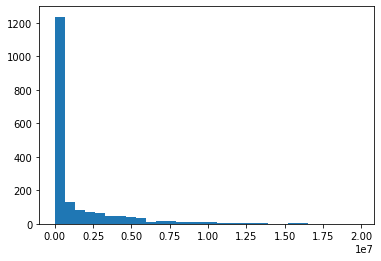

In [29]:
plt.hist(df['Plant annual net generation (MWh)'],bins=30)

In [30]:
Dflarge = df[df['Plant annual net generation (MWh)'] >= 1000000]

(array([91., 73., 55., 50., 55., 43., 39., 26., 13., 15., 14., 10.,  9.,
         9.,  7.,  5.,  3.,  4.,  3.,  4.,  2.,  0.,  1.,  3.,  1.,  1.,
         1.,  1.,  0.,  1.]),
 array([ 1003780.        ,  1631684.46666667,  2259588.93333333,
         2887493.4       ,  3515397.86666667,  4143302.33333333,
         4771206.8       ,  5399111.26666667,  6027015.73333333,
         6654920.2       ,  7282824.66666667,  7910729.13333333,
         8538633.6       ,  9166538.06666667,  9794442.53333333,
        10422347.        , 11050251.46666667, 11678155.93333333,
        12306060.4       , 12933964.86666667, 13561869.33333333,
        14189773.8       , 14817678.26666667, 15445582.73333333,
        16073487.2       , 16701391.66666667, 17329296.13333333,
        17957200.6       , 18585105.06666667, 19213009.53333334,
        19840914.        ]),
 <a list of 30 Patch objects>)

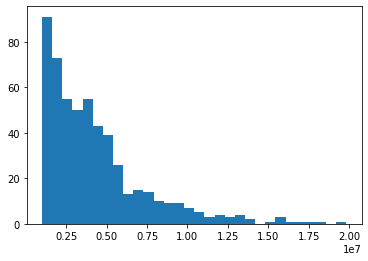

In [31]:
plt.hist(Dflarge['Plant annual net generation (MWh)'],bins=30)

# Chapter 3: Coal and Gas models.

I quickly started to see that the differences between Coal and Gas Emissions seemed pretty significant.  I started running scatter plots to visualize these differences.   Then I started to create regression models to predict Coal CO2 emissions and Gas CO2 emissions seperately.  First I made a simple regression, then I turned it into a multiple regression.  I also then did a little research of how Gas plants' Methane emissions relate to their CO2 emissions, and I did the same for coal.

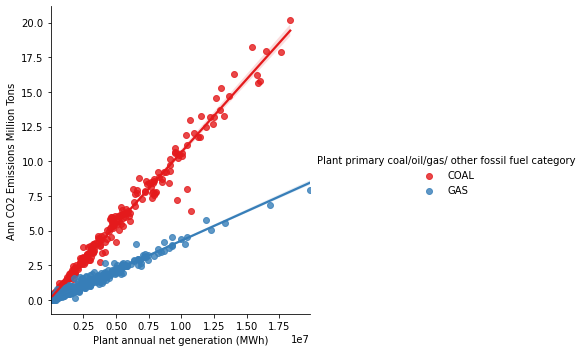

In [32]:
#plt.scatter(df['Plant annual net generation (MWh)'], df['Ann CO2 Emissions Million Tons'])


sns.lmplot(x='Plant annual net generation (MWh)', y='Ann CO2 Emissions Million Tons', data=df, hue='Plant primary coal/oil/gas/ other fossil fuel category',palette='Set1')

In [33]:
#This must be the effect of gas vs natural gas.  Let's plot those seperately
dfCOAL = df[df['Plant primary coal/oil/gas/ other fossil fuel category']=='COAL']
dfGAS = df[df['Plant primary coal/oil/gas/ other fossil fuel category']=='GAS']

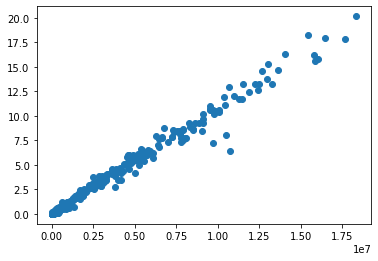

In [34]:
plt.scatter(dfCOAL['Plant annual net generation (MWh)'], dfCOAL['Ann CO2 Emissions Million Tons'])

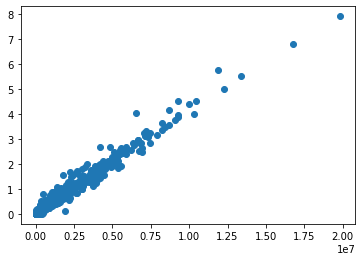

In [35]:
plt.scatter(dfGAS['Plant annual net generation (MWh)'], dfGAS['Ann CO2 Emissions Million Tons'])

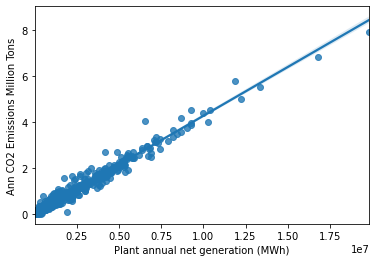

In [36]:
sns.regplot('Plant annual net generation (MWh)', 'Ann CO2 Emissions Million Tons', data=dfGAS)

# Modeling

After learning how different the emissions for gas and coal plants seemed to be, I started doing a number of different iterations of both models in order to see how we could come up with the best prediction of CO2 emissions.

In [37]:
#This is something maybe I can come back to as something to test to see if there is a significant difference between the COAL and GAS emissions.
#First, I'm going to build a linear model between Annual Emissions and Power Generation for Coal and Gas

y = dfCOAL[['Ann CO2 Emissions Million Tons']]
X = dfCOAL[['Plant annual net generation (MWh)']]

scaler.fit(y)

y = scaler.transform(y)


scaler.fit(X)

X = scaler.transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)


In [38]:
print(X_train.shape)

print(X_test.shape)

print(y_train.shape)

print(y_test.shape)

(237, 1)
(79, 1)
(237, 1)
(79, 1)


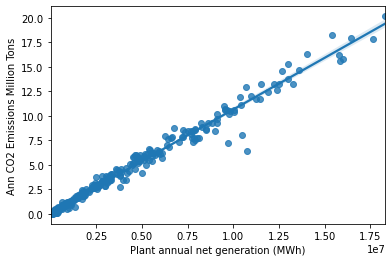

In [39]:
#As expected this is a very direct relationship in both cases.  This seems to be a direct linear relationship.

sns.regplot('Plant annual net generation (MWh)', 'Ann CO2 Emissions Million Tons', data=dfCOAL)

In [40]:
rModel = linear_model.LinearRegression(normalize=True)

In [41]:
# We now want to train the model on our test data.
rModel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [42]:
# Evaluate the model  
print(rModel.score(X_train,y_train))

0.9819393289548926


In [43]:
# Use the model to make predictions about our test data
y_pred = rModel.predict(X_test)

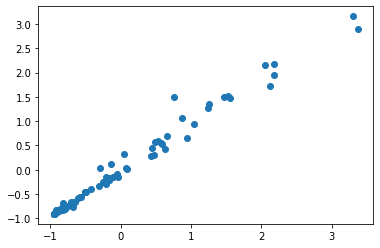

In [44]:

# Let's plot the predictions against the actual result. Use scatter()
plt.scatter(y_test,y_pred)

In [45]:
#Now I"m goinig to make a GAS Model using the OLS Method.

X = dfGAS[['Plant annual net generation (MWh)']]

In [46]:
X = sm.add_constant(X)

In [47]:
y = dfGAS[['Ann CO2 Emissions Million Tons']]
X = dfGAS[['Plant annual net generation (MWh)']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [48]:
# Create the model
rModel2 = sm.OLS(y_train,X_train)

# Fit the model with fit() 
rModel2_results = rModel2.fit()

In [49]:
# Evaluate the model with .summary()
print(rModel2_results.summary())

                                       OLS Regression Results                                      
Dep. Variable:     Ann CO2 Emissions Million Tons   R-squared (uncentered):                   0.984
Model:                                        OLS   Adj. R-squared (uncentered):              0.984
Method:                             Least Squares   F-statistic:                          7.294e+04
Date:                            Tue, 18 Aug 2020   Prob (F-statistic):                        0.00
Time:                                    17:12:49   Log-Likelihood:                          863.52
No. Observations:                            1158   AIC:                                     -1725.
Df Residuals:                                1157   BIC:                                     -1720.
Df Model:                                       1                                                  
Covariance Type:                        nonrobust                                                  


In [50]:
# Let's use our new model to make predictions of the dependent variable y. Use predict(), and plug in X_test as the parameter
y_pred = rModel2_results.predict(X_test)


Text(0, 0.5, 'CO2 Generated - Natural Gas')

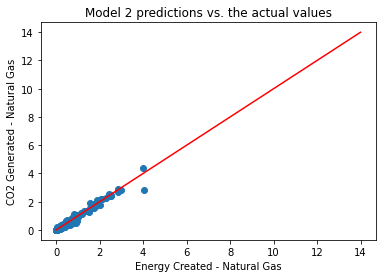

In [51]:

# Plot the predictions
# Build a scatterplot
plt.scatter(y_test, y_pred)

# Add a line for perfect correlation. Can you see what this line is doing? Use plot()
plt.plot([x for x in range(0,15)],[x for x in range(0,15)], color='red')

# Label it nicely
plt.title("Model 2 predictions vs. the actual values")
plt.xlabel("Energy Created - Natural Gas")
plt.ylabel("CO2 Generated - Natural Gas")

In [52]:
#These are very accurate models, but they are no surprise.  Let's investigate some factors that aren't as obvious. 
dfGAS.corr()

,Data Year,Plant latitude,Plant longitude,Number of units,Number of generators,Flag indicating if the plant burned or generated any amount of coal,Plant capacity factor,Plant nameplate capacity (MW),Nonbaseload Factor,Plant annual net generation (MWh),...,Plant annual CH4 emissions (lbs),Plant annual CO2 total output emission rate (lb/MWh),Plant annual CH4 total output emission rate (lb/MWh),Plant unadjusted annual heat input from combustion (MMBtu),Plant nominal heat rate (Btu/kWh),Plant annual total nonrenewables net generation (MWh),Plant annual total renewables net generation (MWh),Plant total nonrenewables generation percent (resource mix),Plant total renewables generation percent (resource mix),Ann CO2 Emissions Million Tons
Data Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Plant latitude,NaN,1.000000,0.065375,-0.006455,-0.083862,-0.015647,-0.135340,-0.229976,0.120035,-0.202163,...,-0.204923,0.022984,0.032479,-0.228417,0.021707,-0.202163,NaN,NaN,NaN,-0.204540
Plant longitude,NaN,0.065375,1.000000,0.055648,0.099375,-0.028960,-0.044196,0.131185,0.051187,0.121955,...,0.124381,-0.023235,-0.018180,0.117574,-0.033334,0.121955,NaN,NaN,NaN,0.122080
Number of units,NaN,-0.006455,0.055648,1.000000,0.790261,-0.063320,-0.178015,0.253035,0.188074,0.111673,...,0.125413,0.020447,0.015867,0.143994,0.012323,0.111673,NaN,NaN,NaN,0.125649
Number of generators,NaN,-0.083862,0.099375,0.790261,1.000000,-0.104628,-0.174554,0.520121,0.200867,0.291088,...,0.317192,0.011302,0.014221,0.306366,0.001422,0.291088,NaN,NaN,NaN,0.308584
Flag indicating if the plant burned or generated any amount of coal,NaN,-0.015647,-0.028960,-0.063320,-0.104628,1.000000,0.007985,-0.052317,-0.029044,-0.016533,...,-0.118053,0.009639,-0.030497,-0.025340,0.014806,-0.016533,NaN,NaN,NaN,-0.030738
Plant capacity factor,NaN,-0.135340,-0.044196,-0.178015,-0.174554,0.007985,1.000000,0.026560,-0.973346,0.355616,...,0.317039,-0.158044,-0.138050,0.367304,-0.142250,0.355616,NaN,NaN,NaN,0.329751
Plant nameplate capacity (MW),NaN,-0.229976,0.131185,0.253035,0.520121,-0.052317,0.026560,1.000000,0.022615,0.759671,...,0.783897,-0.038126,-0.041832,0.758117,-0.044708,0.759671,NaN,NaN,NaN,0.785426
Nonbaseload Factor,NaN,0.120035,0.051187,0.188074,0.200867,-0.029044,-0.973346,0.022615,1.000000,-0.313770,...,-0.268019,0.130167,0.108917,-0.321257,0.113756,-0.313770,NaN,NaN,NaN,-0.282161
Plant annual net generation (MWh),NaN,-0.202163,0.121955,0.111673,0.291088,-0.016533,0.355616,0.759671,-0.313770,1.000000,...,0.967043,-0.065455,-0.067893,0.981271,-0.068990,1.000000,NaN,NaN,NaN,0.989928


In [53]:
dfCOAL.corr()

,Data Year,Plant latitude,Plant longitude,Number of units,Number of generators,Flag indicating if the plant burned or generated any amount of coal,Plant capacity factor,Plant nameplate capacity (MW),Nonbaseload Factor,Plant annual net generation (MWh),...,Plant annual CH4 emissions (lbs),Plant annual CO2 total output emission rate (lb/MWh),Plant annual CH4 total output emission rate (lb/MWh),Plant unadjusted annual heat input from combustion (MMBtu),Plant nominal heat rate (Btu/kWh),Plant annual total nonrenewables net generation (MWh),Plant annual total renewables net generation (MWh),Plant total nonrenewables generation percent (resource mix),Plant total renewables generation percent (resource mix),Ann CO2 Emissions Million Tons
Data Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Plant latitude,NaN,1.000000,-0.363627,0.033542,-0.005976,-0.000409,0.055835,-0.334555,-0.042785,-0.228748,...,-0.194545,0.003083,0.023231,-0.225848,-0.017756,-0.228748,NaN,NaN,NaN,-0.218694
Plant longitude,NaN,-0.363627,1.000000,0.029315,0.079566,0.106593,-0.241275,0.155471,0.216901,0.028706,...,0.009929,-0.023860,-0.045092,0.014818,-0.001719,0.028706,NaN,NaN,NaN,0.010408
Number of units,NaN,0.033542,0.029315,1.000000,0.735232,0.001664,-0.173435,0.366251,0.187726,0.217878,...,0.176357,-0.155177,-0.165635,0.232765,-0.121742,0.217878,NaN,NaN,NaN,0.193534
Number of generators,NaN,-0.005976,0.079566,0.735232,1.000000,-0.095136,-0.291241,0.464609,0.313120,0.220417,...,0.163547,-0.088136,-0.105480,0.221557,-0.050828,0.220417,NaN,NaN,NaN,0.193799
Flag indicating if the plant burned or generated any amount of coal,NaN,-0.000409,0.106593,0.001664,-0.095136,1.000000,-0.039095,-0.159341,0.044746,-0.133426,...,-0.139260,-0.214088,-0.262409,-0.130177,-0.152405,-0.133426,NaN,NaN,NaN,-0.141126
Plant capacity factor,NaN,0.055835,-0.241275,-0.173435,-0.291241,-0.039095,1.000000,0.041859,-0.981491,0.435021,...,0.443397,0.036927,0.056953,0.442476,-0.008644,0.435021,NaN,NaN,NaN,0.442523
Plant nameplate capacity (MW),NaN,-0.334555,0.155471,0.366251,0.464609,-0.159341,0.041859,1.000000,-0.015250,0.830618,...,0.796756,-0.041386,-0.020008,0.825933,-0.034482,0.830618,NaN,NaN,NaN,0.818817
Nonbaseload Factor,NaN,-0.042785,0.216901,0.187726,0.313120,0.044746,-0.981491,-0.015250,1.000000,-0.419587,...,-0.430311,-0.047345,-0.063450,-0.425276,-0.005793,-0.419587,NaN,NaN,NaN,-0.427386
Plant annual net generation (MWh),NaN,-0.228748,0.028706,0.217878,0.220417,-0.133426,0.435021,0.830618,-0.419587,1.000000,...,0.979482,-0.050553,-0.017316,0.994562,-0.060704,1.000000,NaN,NaN,NaN,0.990719


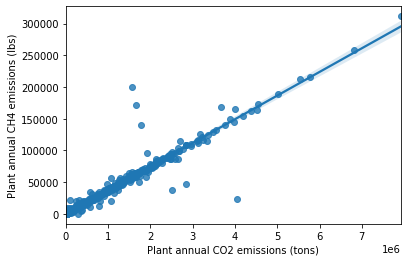

In [54]:
#How much does Methane emission rise with CO2 Emission for Coal and Natural Gas.  Are the ratios different?

sns.regplot('Plant annual CO2 emissions (tons)', 'Plant annual CH4 emissions (lbs)', data=dfGAS)

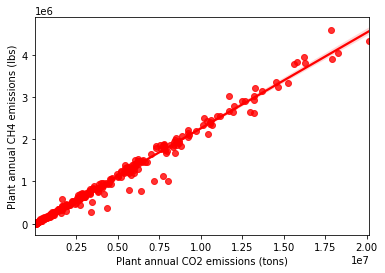

In [55]:
sns.regplot('Plant annual CO2 emissions (tons)', 'Plant annual CH4 emissions (lbs)', data=dfCOAL, color='red', marker = 'o')

In [56]:
#Now I'm going to make a multiple regression including 'Plant unadjusted annual heat input from combustion (MMBtu)' to see if I can make the model more accurate.

X = dfCOAL[['Plant annual net generation (MWh)','Plant unadjusted annual heat input from combustion (MMBtu)']]



In [57]:
X = sm.add_constant(X)

In [58]:
y = dfCOAL[['Ann CO2 Emissions Million Tons']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [59]:
# Create the model
rModel3 = sm.OLS(y_train,X_train)

# Fit the model with fit() 
rModel3_results = rModel3.fit()

In [60]:
print(rModel3_results.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Ann CO2 Emissions Million Tons   R-squared:                       0.991
Model:                                        OLS   Adj. R-squared:                  0.991
Method:                             Least Squares   F-statistic:                 1.240e+04
Date:                            Tue, 18 Aug 2020   Prob (F-statistic):          3.67e-238
Time:                                    17:12:51   Log-Likelihood:                -122.02
No. Observations:                             237   AIC:                             250.0
Df Residuals:                                 234   BIC:                             260.4
Df Model:                                       2                                         
Covariance Type:                        nonrobust                                         
                                                                 coef    std err          

In [61]:
#This produces an even higher R-squared.  Wow!

# Chapter 4:  Null hypothesis Testing

Finally I decided to do some null hypothesis testing.  First to test the null hypothesis that Gas CO2 emissions were the same as Coal CO2 emissions.  Then to test the null hypothesis that fuel source didn't make a difference in CO2 emissions for Coal plants. 

Then as I realized that that fuel source for Coal was driving a difference in emissions, I added dummy variables for the fuel sources and added this to the regression.  This created ultimately the model that I would use as an output of this project to predict CO2 output for Coal plants.

In [62]:
#This command turns a dataframe into a numpy 1D array:

coaltest = dfCOAL['Plant annual CO2 total output emission rate (lb/MWh)'].values.ravel()
gastest = dfGAS['Plant annual CO2 total output emission rate (lb/MWh)'].values.ravel()

In [63]:
coalnew = np.random.choice(coaltest,100, replace = False)
gasnew = np.random.choice(gastest,100, replace = False)

In [64]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [65]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [66]:
# I want to test the null hypothesis the CO2 Emissions for Natural Gas are the same as for Coal.  I already know the answer, but I will do this to test my null hypothesis testing.  I'll use the 'Plant annual CO2 total output emission rate (lb/MWh)' metric to test this.
#Plant annual CO2 total output emission rate (lb/MWh)

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff


In [67]:
coalvgas = diff_of_means(coalnew, gasnew)

In [68]:
perm_replicates = draw_perm_reps(coalnew, gasnew,diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= coalvgas) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0


In [69]:
#We can clearly reject the null hypotheses that the mean Coal CO2 emission rate is the same as the mean Gas CO2 emission rate.

# Differences by Fuel Source

After the previous tests, I wanted to see if the different types of coal resulted in different emissions.

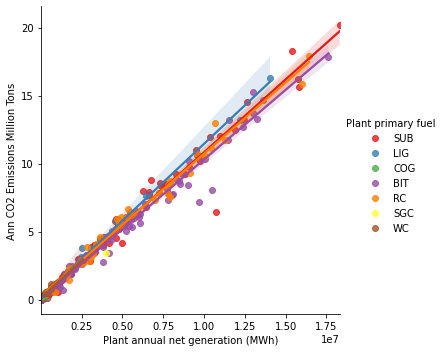

In [70]:
#Within coal there seems to be a difference between the emissions depending on the type of fuel also. 
sns.lmplot(x='Plant annual net generation (MWh)', y='Ann CO2 Emissions Million Tons', data=dfCOAL, hue='Plant primary fuel',palette='Set1')

In [71]:
dfCOAL['Plant primary fuel'].value_counts()

SUB    124
BIT    111
RC      42
WC      17
LIG     15
COG      6
SGC      1
Name: Plant primary fuel, dtype: int64

In [72]:
#I will make the null hypothesis that SUB and BIT Fuel types produce the same emissions

In [73]:
SUB = dfCOAL[dfCOAL['Plant primary fuel']=='SUB']

In [74]:
SUB = SUB['Plant annual CO2 total output emission rate (lb/MWh)'].values.ravel()

In [75]:
BIT = dfCOAL[dfCOAL['Plant primary fuel']=='BIT']

In [76]:
BIT = BIT['Plant annual CO2 total output emission rate (lb/MWh)'].values.ravel()

In [77]:
SUBvsBIT = diff_of_means(SUB, BIT)

print(SUBvsBIT)

256.5660242662025


In [78]:
perm_replicates2 = draw_perm_reps(SUB, BIT, diff_of_means, size=10000)


In [79]:
# Compute p-value: p
p = np.sum(perm_replicates2 >= SUBvsBIT) / len(perm_replicates2)

# Print the result
print('p-value =', p)

p-value = 0.0169


In [80]:
#This also shows that using the SUB vs the BIT fuel source leads to significantly different results in CO2 emissions.

In [81]:
#The last step to do is to use categorical variables (e.g. Plant Primary Fuel) also as part of the Regression to see if I can further improve it.

In [82]:
dfCOAL = pd.concat([dfCOAL, pd.get_dummies(df['Plant primary fuel'])], axis=1).drop(['Plant primary fuel'], axis =1)

In [83]:
dfCOAL.fillna(0, inplace=True)

In [84]:
dfCOAL.corr()

,Data Year,Plant latitude,Plant longitude,Number of units,Number of generators,Flag indicating if the plant burned or generated any amount of coal,Plant capacity factor,Plant nameplate capacity (MW),Nonbaseload Factor,Plant annual net generation (MWh),...,Plant total renewables generation percent (resource mix),Ann CO2 Emissions Million Tons,BIT,COG,LIG,NG,RC,SGC,SUB,WC
Data Year,1.000000,0.988843,-0.988273,0.796243,0.786950,0.987741,0.858396,0.710681,0.864318,0.646580,...,NaN,0.654377,0.556861,0.125748,0.199309,-1.000000,0.335976,0.051267,0.590767,0.212296
Plant latitude,0.988843,1.000000,-0.985518,0.790382,0.777621,0.976712,0.853085,0.667692,0.851470,0.613372,...,NaN,0.622442,0.529052,0.124002,0.199845,-0.988843,0.337134,0.049914,0.597313,0.219393
Plant longitude,-0.988273,-0.985518,1.000000,-0.784198,-0.770226,-0.973618,-0.867229,-0.685646,-0.837525,-0.635654,...,NaN,-0.645501,-0.504605,-0.109725,-0.224439,0.988273,-0.330029,-0.047932,-0.632841,-0.181839
Number of units,0.796243,0.790382,-0.784198,1.000000,0.901052,0.786640,0.629667,0.721755,0.745327,0.615387,...,NaN,0.609578,0.513430,0.100036,0.088884,-0.796243,0.242923,0.026332,0.482329,0.071018
Number of generators,0.786950,0.777621,-0.770226,0.901052,1.000000,0.768140,0.583330,0.760948,0.777345,0.612574,...,NaN,0.605383,0.517082,0.032556,0.098102,-0.786950,0.270633,0.077864,0.469075,0.035734
Flag indicating if the plant burned or generated any amount of coal,0.987741,0.976712,-0.973618,0.786640,0.768140,1.000000,0.844742,0.684471,0.857236,0.622765,...,NaN,0.629697,0.541515,0.267348,0.191726,-0.987741,0.323193,0.049317,0.568291,0.204219
Plant capacity factor,0.858396,0.853085,-0.867229,0.629667,0.583330,0.844742,1.000000,0.625152,0.488697,0.725259,...,NaN,0.733371,0.369268,0.089879,0.158889,-0.858396,0.354059,0.051879,0.540089,0.284281
Plant nameplate capacity (MW),0.710681,0.667692,-0.685646,0.721755,0.760948,0.684471,0.625152,1.000000,0.608859,0.905283,...,NaN,0.900644,0.460895,-0.014833,0.119094,-0.710681,0.332674,0.034371,0.395180,-0.009437
Nonbaseload Factor,0.864318,0.851470,-0.837525,0.745327,0.777345,0.857236,0.488697,0.608859,1.000000,0.397868,...,NaN,0.403050,0.578723,0.127658,0.183960,-0.864318,0.228025,0.038257,0.487137,0.079057
Plant annual net generation (MWh),0.646580,0.613372,-0.635654,0.615387,0.612574,0.622765,0.725259,0.905283,0.397868,1.000000,...,NaN,0.994594,0.367421,-0.012927,0.108908,-0.646580,0.347523,0.036041,0.379688,-0.004255


In [85]:
#Now I'm going to make a multiple regression including 'Plant unadjusted annual heat input from combustion (MMBtu)' to see if I can make the model more accurate.

X = dfCOAL[['Plant annual net generation (MWh)','Plant unadjusted annual heat input from combustion (MMBtu)', 'BIT','COG','LIG','NG','RC','SGC','SUB','WC']]


In [86]:
X = sm.add_constant(X)

In [87]:
y = dfCOAL[['Ann CO2 Emissions Million Tons']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [88]:
# Create the model
rModel4 = sm.OLS(y_train,X_train)

# Fit the model with fit() 
rModel4_results = rModel4.fit()

In [89]:
#This is my most accurate model for predicting CO2 Emissions from COAL with an R2 of .997.

print(rModel4_results.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Ann CO2 Emissions Million Tons   R-squared:                       0.997
Model:                                        OLS   Adj. R-squared:                  0.997
Method:                             Least Squares   F-statistic:                 5.065e+04
Date:                            Tue, 18 Aug 2020   Prob (F-statistic):               0.00
Time:                                    17:12:55   Log-Likelihood:                 928.35
No. Observations:                            1395   AIC:                            -1837.
Df Residuals:                                1385   BIC:                            -1784.
Df Model:                                       9                                         
Covariance Type:                        nonrobust                                         
                                                                 coef    std err          

In [90]:
# Let's use our new model to make predictions of the dependent variable y. Use predict(), and plug in X_test as the parameter
y_pred = rModel4_results.predict(X_test)

Text(0, 0.5, 'CO2 Generated - COAL')

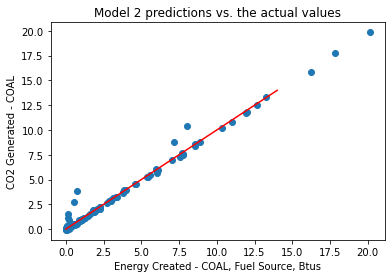

In [91]:
# Plot the predictions
# Build a scatterplot
plt.scatter(y_test, y_pred)

# Add a line for perfect correlation. Can you see what this line is doing? Use plot()
plt.plot([x for x in range(0,15)],[x for x in range(0,15)], color='red')

# Label it nicely
plt.title("Model 2 predictions vs. the actual values")
plt.xlabel("Energy Created - COAL, Fuel Source, Btus")
plt.ylabel("CO2 Generated - COAL")

In [92]:
# Define a function to check the RMSE. Remember the def keyword needed to make functions? 
from math import sqrt

def RMSE(y_actual, y_predicted):
    return sqrt(mean_squared_error(y_actual, y_predicted))
    
'''OR
    def rmse(predictions, targets):
        return np.sqrt(((predictions - targets) ** 2).mean())'''

'OR\n    def rmse(predictions, targets):\n        return np.sqrt(((predictions - targets) ** 2).mean())'

In [93]:

# Get predictions from rModel4

# Put the predictions & actual values into a dataframe

matches = pd.DataFrame(y_test)
matches.rename(columns = {'Ann CO2 Emissions Million Tons':'actual'}, inplace=True)
matches["predicted"] = y_pred

RMSE(matches["actual"], matches["predicted"])

0.2415467752363869

# Chapter 5:  Supervised Learning Models 

The multiple regression model with dummy variables for fuel source seems to be an excellent model for predicting CO2 from the results.  I want to test out some other supervised learning models, however, to see if there are other features from this dataset that I can predict.  Lets' first test out a logistic regression model to see if I can predict whether or not the plant is coal or gas based on output of CO2 and Methane

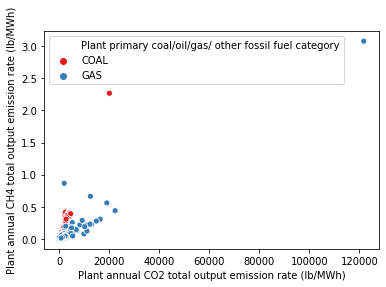

In [94]:
sns.scatterplot(x='Plant annual CO2 total output emission rate (lb/MWh)', y='Plant annual CH4 total output emission rate (lb/MWh)', data=df, hue='Plant primary coal/oil/gas/ other fossil fuel category',palette='Set1')

dflog = df


In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into a training and test set.  If there are more categories than COAL or GAS, this formula will still work.  
Xlr, Xtestlr, ylr, ytestlr = train_test_split(dflog[['Plant annual CO2 total output emission rate (lb/MWh)', 'Plant annual CH4 total output emission rate (lb/MWh)']].values, 
                                              (dflog['Plant primary coal/oil/gas/ other fossil fuel category']).values,random_state=5, test_size = .20)

clf = LogisticRegression()
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.9650537634408602


# Chapt 5.1:  Logisitic Regression Tuning

Now I am going to tune the model with cross validation and grid search.   I will tun the regularization parameter C.   

In [96]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [97]:
clf = LogisticRegression()
score = cv_score(clf, Xlr, ylr)
print(score)

0.9630443133798838


In [98]:

#the grid of parameters to search over
Cs = [0.1, 1, 100, 300]

# your turn
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegressionCV

for i in Cs:
    clf = LogisticRegressionCV(Cs=[i], max_iter= 1000, random_state=0).fit(Xlr, ylr)
    clf.predict(Xlr)
    print(i,clf.score(Xlr,ylr))

0.1 0.8259408602150538
1 0.9616935483870968
100 0.9825268817204301
300 0.9831989247311828


In [99]:
# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(dflog[['Plant annual CO2 total output emission rate (lb/MWh)', 'Plant annual CH4 total output emission rate (lb/MWh)']].values, 
                                              (dflog['Plant primary coal/oil/gas/ other fossil fuel category']).values,random_state=5, test_size = .20)




In [100]:
#Higher C essentially means that there is a lower penalty/regularization for misclassification (coefficients will not change that much).  If C is lower it means higher penality and the coefficient will change a lot.  

from sklearn.model_selection import GridSearchCV

grid = {'C': [0.1, 1, 100, 300]}

clf = GridSearchCV(LogisticRegression(), grid, cv = 5)

clf.fit(Xlr, ylr)

print(clf.best_params_)


{'C': 300}


In [101]:
clf = LogisticRegression(C=300)
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
# Print the accuracy from the testing data.
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

print(classification_report(clf.predict(Xtestlr), ytestlr))

print(confusion_matrix(clf.predict(Xtestlr), ytestlr))



0.9919354838709677
              precision    recall  f1-score   support

        COAL       0.95      1.00      0.97        58
         GAS       1.00      0.99      1.00       314

    accuracy                           0.99       372
   macro avg       0.98      1.00      0.98       372
weighted avg       0.99      0.99      0.99       372

[[ 58   0]
 [  3 311]]


# Chapt. 5.2:  Random Forests

Lets use a random forest model in order to predict fuel source by CO2 and Methane output for COAL Plants only.  I did some parameter tuning based on Max Depth.

In [102]:
COAL = df[df['Plant primary coal/oil/gas/ other fossil fuel category']=='COAL']


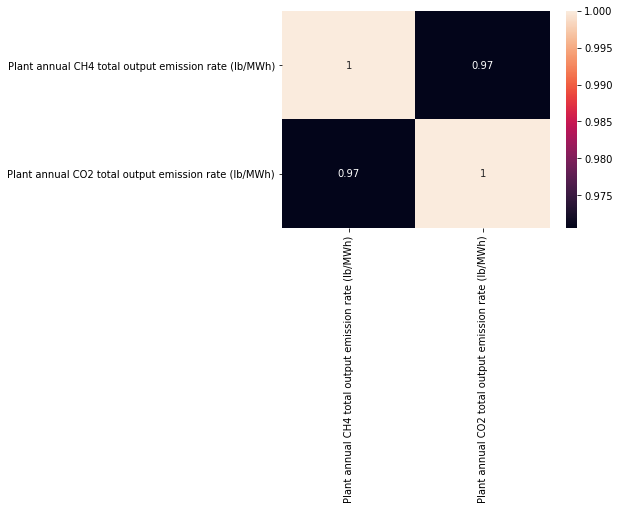

In [103]:
COAL = COAL[['Plant primary fuel', 'Plant annual CH4 total output emission rate (lb/MWh)', 'Plant annual CO2 total output emission rate (lb/MWh)']]


sns.heatmap(COAL.corr(), annot=True)
y = COAL['Plant primary fuel']

X = COAL.loc[:, COAL.columns != 'Plant primary fuel']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score


In [105]:
max_depths = [1, 2, 3]
for max_depth in max_depths:
    rf = RandomForestClassifier(n_estimators=100, max_depth= max_depth, random_state= 123)
    rf.fit(X_train, y_train)
    print("Max_depths: ", max_depth)
    print("Accuracy score (training): {0:.3f}".format(rf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(rf.score(X_test, y_test)))
    print()

Max_depths:  1
Accuracy score (training): 0.460
Accuracy score (validation): 0.391

Max_depths:  2
Accuracy score (training): 0.528
Accuracy score (validation): 0.422

Max_depths:  3
Accuracy score (training): 0.532
Accuracy score (validation): 0.406



In [106]:
RFModel = RandomForestClassifier(n_estimators=100, max_depth= 3, random_state= 123)
RFModel.fit(X_train, y_train)

y_pred = RFModel.predict(X_test)

pd.Series(y_pred)

ac = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

print(classification_report(RFModel.predict(X_test), y_test))

print(confusion_matrix(RFModel.predict(X_test), y_test))


Random Forest: Accuracy=0.406
Random Forest: f1-score=0.347
              precision    recall  f1-score   support

         BIT       0.48      0.45      0.47        22
         COG       1.00      1.00      1.00         1
         LIG       0.00      0.00      0.00         0
          RC       0.00      0.00      0.00         0
         SUB       0.62      0.38      0.48        39
          WC       0.00      0.00      0.00         2

    accuracy                           0.41        64
   macro avg       0.35      0.31      0.32        64
weighted avg       0.56      0.41      0.47        64

[[10  0  2  0  9  1]
 [ 0  1  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [10  0  3 10 15  1]
 [ 1  0  1  0  0  0]]


/home/jeremy/Springboard/SpringBoard_Projects/Capstone_2/CapstoneTwo/venv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The first Random Forest model didn't give great results.  Lets just try to predict COAL vs Natural Gas again but with a Random Forest with Baynesian Optimization.

In [107]:
y = df['Plant primary coal/oil/gas/ other fossil fuel category']

X = df[['Plant annual CO2 total output emission rate (lb/MWh)', 'Plant annual CH4 total output emission rate (lb/MWh)']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=246)



In [108]:
! pip install bayesian-optimization

In [109]:
from bayes_opt import BayesianOptimization
from bayes_opt.util import Colours
from sklearn.model_selection import cross_val_score

def rfc_cv(n_estimators, max_depth, data, targets):
    """Random Forest cross validation.
    This function will instantiate a random forest classifier with parameters
    n_estimators, min_samples_split, and max_features. Combined with data and
    targets this will in turn be used to perform cross validation. The result
    of cross validation is returned.
    Our goal is to find combinations of n_estimators, min_samples_split, and
    max_features that minimzes the log loss.
    """
    estimator = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        random_state=2
    )
    cval = cross_val_score(estimator, data, targets,
                           scoring='neg_log_loss', cv=4)
    return cval.mean()


def optimize_rfc(data, targets):
    """Apply Bayesian Optimization to Random Forest parameters."""
    def rfc_crossval(n_estimators, max_depth):
        """Wrapper of RandomForest cross validation.
        Notice how we ensure n_estimators and min_samples_split are casted
        to integer before we pass them along. Moreover, to avoid max_features
        taking values outside the (0, 1) range, we also ensure it is capped
        accordingly.
        """
        return rfc_cv(
            n_estimators=int(n_estimators),
            max_depth=int(max_depth),
            data=data,
            targets=targets,
        )

    optimizer = BayesianOptimization(
        f=rfc_crossval,
        pbounds={
            "n_estimators": (100, 500),
            "max_depth": (1, 3),
        },
        random_state=1234,
        verbose=2
    )
    optimizer.maximize(n_iter=10)

    print("Final result:", optimizer.max)
    
optimize_rfc(X_train, y_train)

|   iter    |  target   | max_depth | n_esti... |
-------------------------------------------------
|  1        | -0.1447   |  1.383    |  348.8    |
|  2        | -0.146    |  1.875    |  414.1    |
|  3        | -0.08616  |  2.56     |  209.0    |
|  4        | -0.146    |  1.553    |  420.7    |
|  5        | -0.08726  |  2.916    |  450.4    |
|  6        | -0.06569  |  3.0      |  100.0    |
|  7        | -0.08664  |  3.0      |  500.0    |
|  8        | -0.08944  |  2.966    |  150.4    |
|  9        | -0.08615  |  2.978    |  270.5    |
|  10       | -0.08626  |  2.987    |  478.5    |
|  11       | -0.1463   |  1.021    |  118.2    |
|  12       | -0.06668  |  3.0      |  306.2    |
|  13       | -0.0871   |  2.935    |  180.6    |
|  14       | -0.08673  |  2.952    |  236.6    |
|  15       | -0.08942  |  2.596    |  103.4    |
Final result: {'target': -0.06568972551284633, 'params': {'max_depth': 3.0, 'n_estimators': 100.0}}


In [111]:
RF2Model = RandomForestClassifier(n_estimators=100, max_depth= 3, random_state= 123)
RF2Model.fit(X_train, y_train)

y_pred = RF2Model.predict(X_test)

pd.Series(y_pred)

ac = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

print(classification_report(RF2Model.predict(X_test), y_test))

print(confusion_matrix(RF2Model.predict(X_test), y_test))


Random Forest: Accuracy=0.996
Random Forest: f1-score=0.996
              precision    recall  f1-score   support

        COAL       0.99      0.99      0.99        79
         GAS       1.00      1.00      1.00       386

    accuracy                           1.00       465
   macro avg       0.99      0.99      0.99       465
weighted avg       1.00      1.00      1.00       465

[[ 78   1]
 [  1 385]]


# Chapt 5.3:  Decision Tree Modeling

Next I want to see if we can use a decision Tree Model in order to predict what type of fuel was used for Coal Plants by looking at CH4 and CO2 emissions.

In [112]:
from sklearn import tree, metrics
entr_model = tree.DecisionTreeClassifier(criterion="entropy", random_state = 1234)

In [113]:
y = df['Plant primary coal/oil/gas/ other fossil fuel category']

X = df[['Plant annual CO2 total output emission rate (lb/MWh)', 'Plant annual CH4 total output emission rate (lb/MWh)']]

In [114]:
# Call train_test_split on X, y. Make the test_size = 0.25, and random_state = 246
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=246)

# Entropy Model - No Max Depth

Let's see how accurate a model we can get with no restrictions on max depth.

In [115]:

entr_model = tree.DecisionTreeClassifier(criterion="entropy", random_state = 1234)

entr_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

In [116]:
y_pred = entr_model.predict(X_test)

# Call Series on our y_pred variable with the following: pd.Series(y_pred)
pd.Series(y_pred)

# Check out entr_model
entr_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

In [117]:
! pip install scikit-learn==0.22

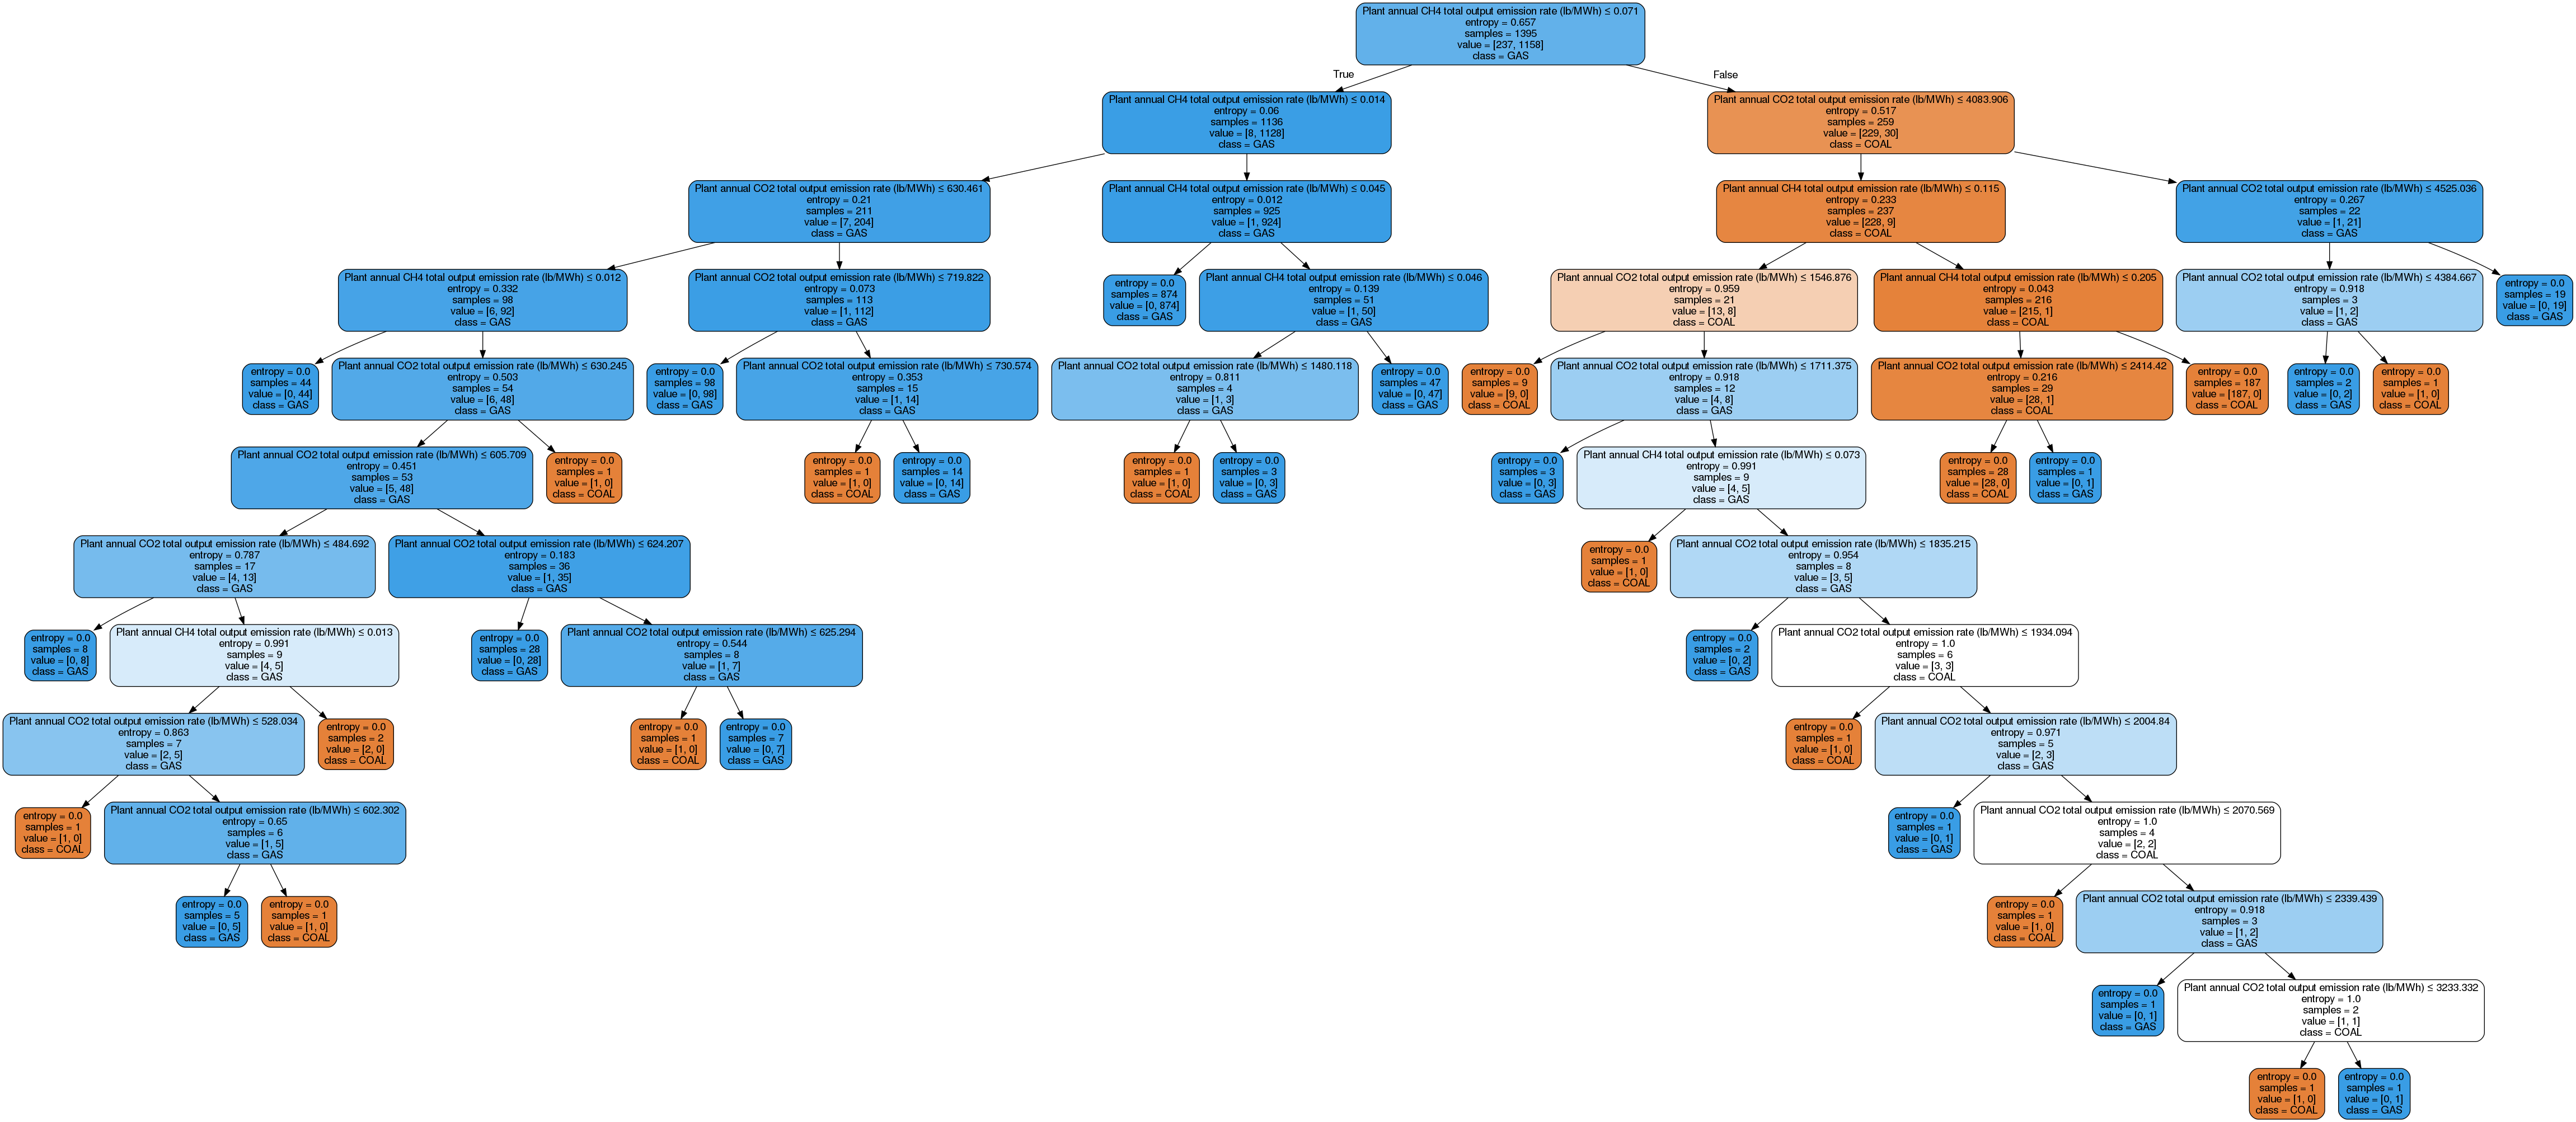

In [118]:
from sklearn.externals.six import StringIO 
import pydotplus
from IPython.display import Image 

# Now we want to visualize the tree
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(entr_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["COAL", "GAS"]) 

# Alternatively for class_names use entr_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [119]:
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "GAS"' , metrics.precision_score(y_test,y_pred, pos_label = "GAS"))
print('Precision score for "COAL"' , metrics.precision_score(y_test,y_pred, pos_label = "COAL"))
print('Recall score for "GAS"' , metrics.recall_score(y_test,y_pred, pos_label = "GAS"))
print('Recall score for "COAL"' , metrics.recall_score(y_test,y_pred, pos_label = "COAL"))

Model Entropy - no max depth
Accuracy: 0.9849462365591398
Balanced accuracy: 0.9808650882140748
Precision score for "GAS" 0.9947780678851175
Precision score for "COAL" 0.9390243902439024
Recall score for "GAS" 0.9870466321243523
Recall score for "COAL" 0.9746835443037974


# Gini impurity model - no max_depth

In [120]:
# Make a variable called gini_model, and assign it exactly what you assigned entr_model with above, but with the
# criterion changed to 'gini'
gini_model = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 1234)

# Call fit() on the gini_model as you did with the entr_model
gini_model.fit(X_train, y_train)

# Call predict() on the gini_model as you did with the entr_model 
y_pred = gini_model.predict(X_test)
# Turn y_pred into a series, as before
pd.Series(y_pred)

# Check out gini_model
gini_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

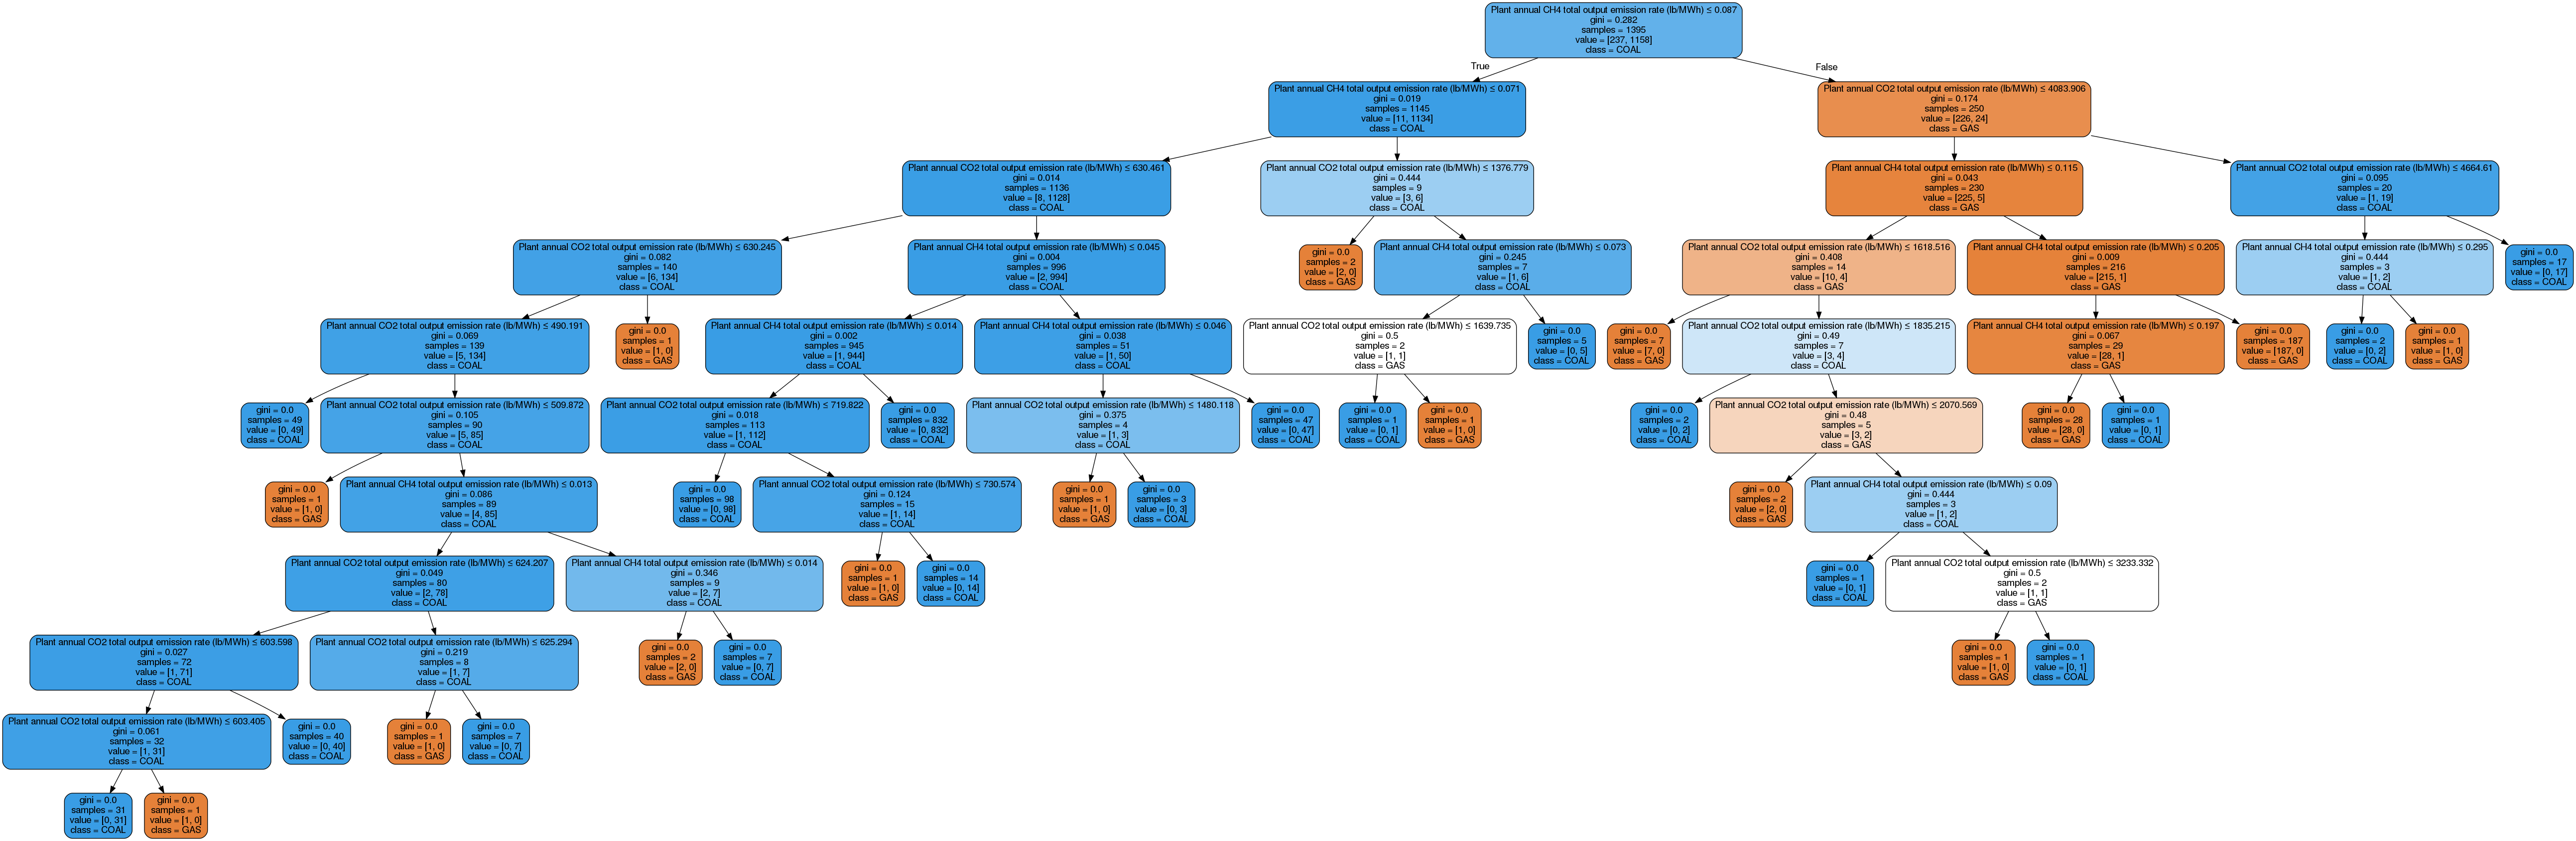

In [121]:
# As before, but make the model name gini_model
dot_data = StringIO()
tree.export_graphviz(gini_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["GAS", "COAL"]) 
# Alternatively for class_names use gini_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [122]:
# Run this block for model evaluation
print("Model Gini impurity model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "GAS"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "COAL"))

Model Gini impurity model
Accuracy: 0.989247311827957
Balanced accuracy: 0.9834557617892044
Precision score 0.9948051948051948
Recall score 0.9746835443037974


# Decision Tree with max Depth of 3

In [123]:
# Made a model as before, but call it entr_model2, and make the max_depth parameter equal to 3. 
# Execute the fitting, predicting, and Series operations as before


entr_model2 = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 3, random_state = 1234)

# Call fit() on entr_model
entr_model2.fit(X_train, y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 

y_pred = entr_model2.predict(X_test)

# Call Series on our y_pred variable with the following: pd.Series(y_pred)
pd.Series(y_pred)

# Check out entr_model
entr_model2

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

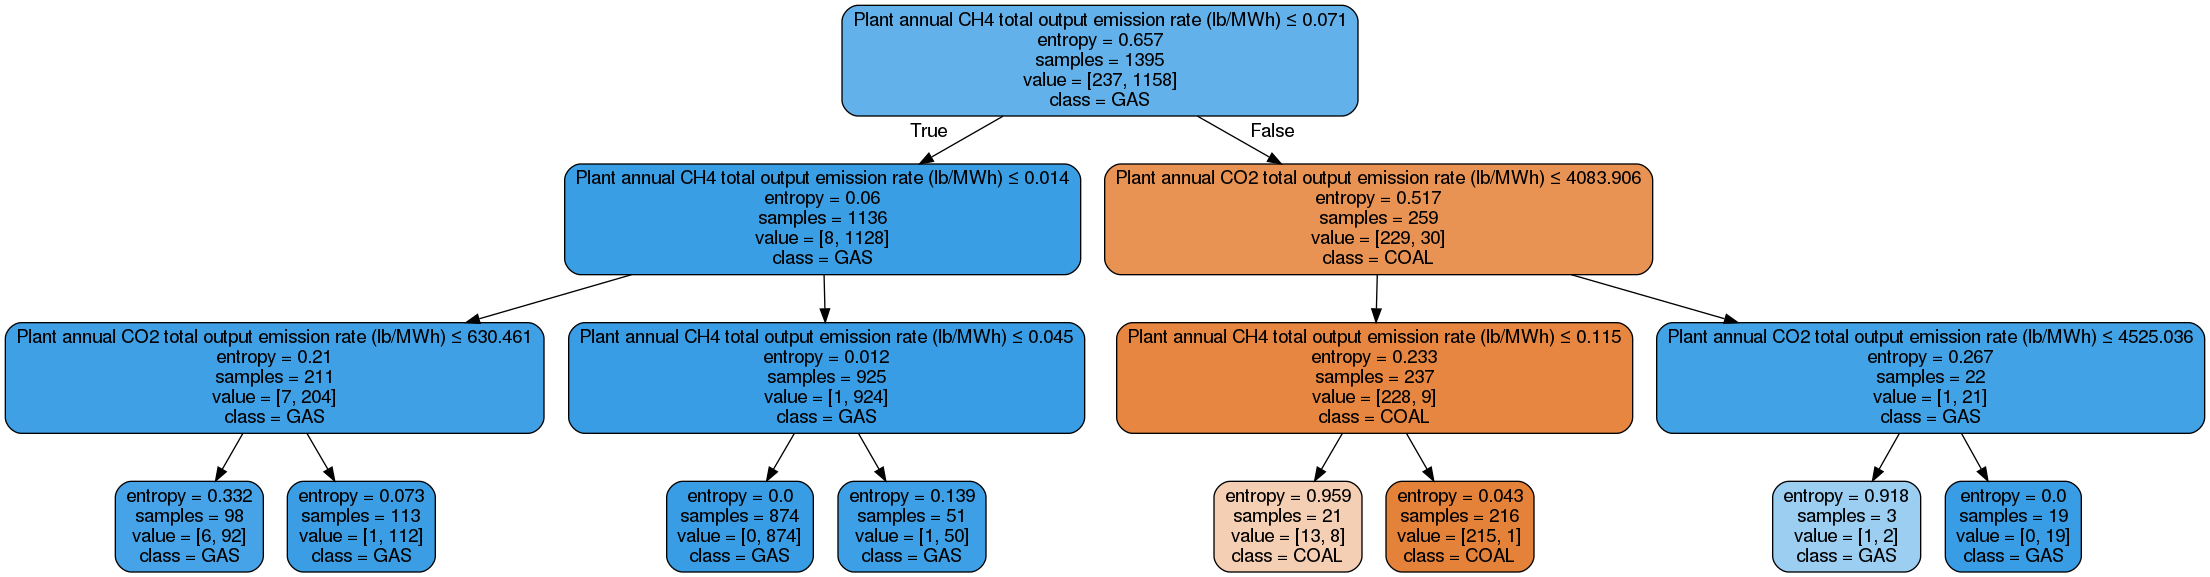

In [124]:
# As before, we need to visualize the tree to grasp its nature
dot_data = StringIO()

tree.export_graphviz(entr_model2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["COAL", "GAS"]) 

#Alternatively for class_names use entr_model2.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [125]:
# Run this block for model evaluation 
print("Model Entropy model max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "COAL"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "GAS"))

Model Entropy model max depth 3
Accuracy: 0.9870967741935484
Balanced accuracy: 0.9871942021381255
Precision score for "Yes" 0.9397590361445783
Recall score for "No" 0.9870466321243523


# Gini Impurity Model - Max Depth 3

In [126]:

# As before, make a variable, but call it gini_model2, and ensure the max_depth parameter is set to 3
gini_model2 = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 1234, max_depth = 3)
# Do the fit, predict, and series transformations as before. 
gini_model2.fit(X_train, y_train)


# Call predict() on the gini_model as you did with the entr_model 
y_pred = gini_model2.predict(X_test)
# Turn y_pred into a series, as before
pd.Series(y_pred)

# Check out gini_model
gini_model2

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

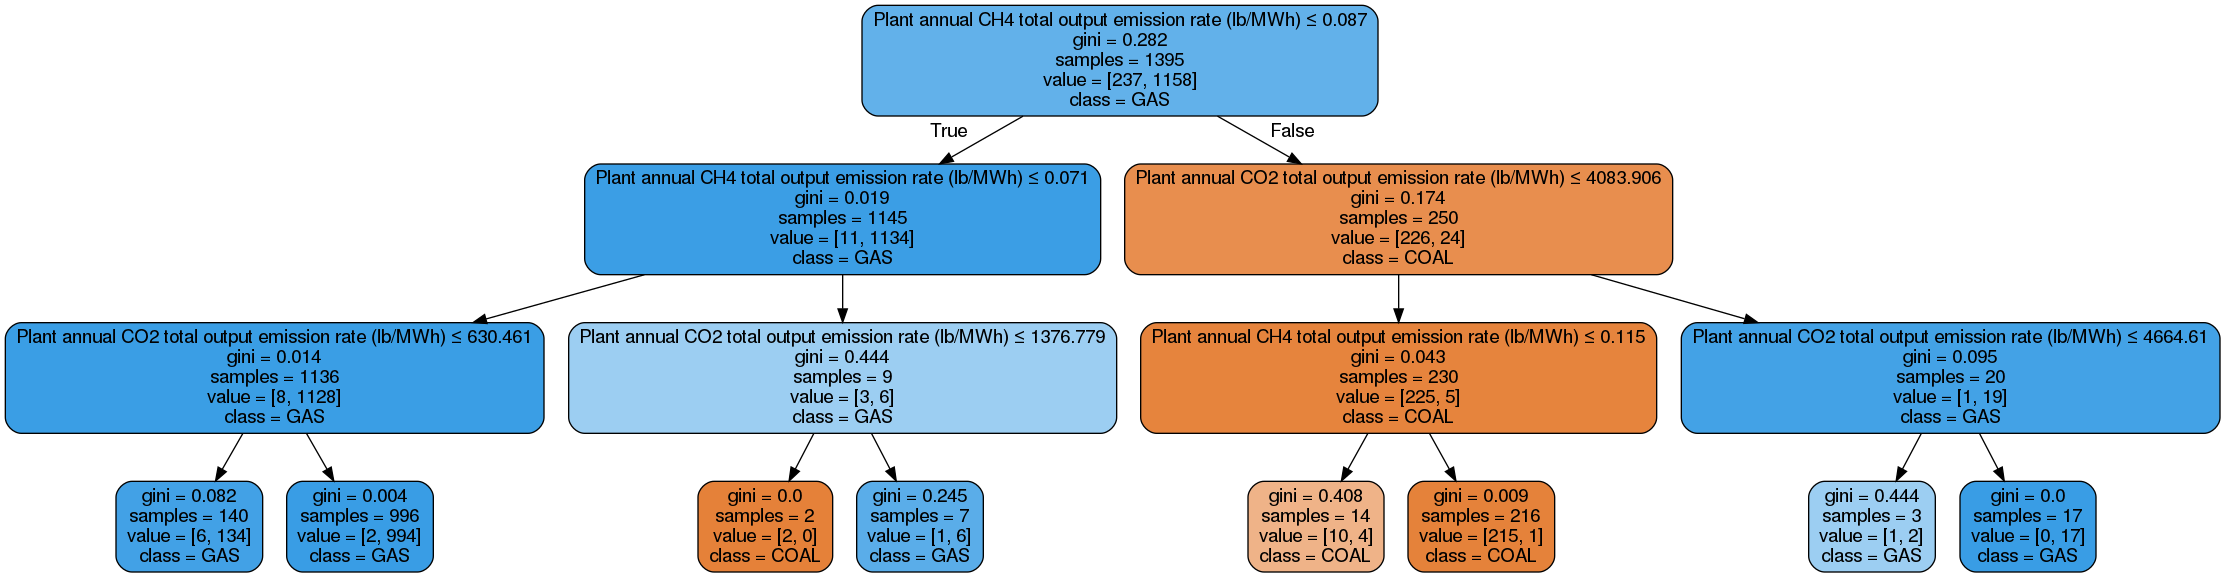

In [127]:
dot_data = StringIO()

tree.export_graphviz(gini_model2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["COAL", "GAS"]) 
# Alternatively for class_names use gini_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())




In [128]:
print("Gini impurity  model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "COAL"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "GAS"))

Gini impurity  model - max depth 3
Accuracy: 0.9935483870967742
Balanced accuracy: 0.9910802125008198
Precision score 0.975
Recall score 0.9948186528497409


This last model with Max Depth of 3 of Gini Impurity is the best Decision Tree model.  It has a very high scores, but it is also reatively interpretable given that there are only 3 levels of depth.  The unlimited trees created charts that are too complicated to follow. 

# Chapter 5.4:  Gradient Boosting

For this.  Let's once again test a model to see if we can predict whether or not a plant is gas or coal based on the combination of Methane and Carbon Dioxide output.

In [129]:
y = df['Plant primary coal/oil/gas/ other fossil fuel category']

X = df[['Plant annual CO2 total output emission rate (lb/MWh)', 'Plant annual CH4 total output emission rate (lb/MWh)']]

In [130]:
y = y.replace(['COAL', 'GAS'], [0, 1]) 

In [131]:
y.value_counts()

1    1544
0     316
Name: Plant primary coal/oil/gas/ other fossil fuel category, dtype: int64

In [132]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)

In [133]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [134]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.990
Accuracy score (validation): 0.983

Learning rate:  0.1
Accuracy score (training): 0.992
Accuracy score (validation): 0.983

Learning rate:  0.25
Accuracy score (training): 0.994
Accuracy score (validation): 0.983

Learning rate:  0.5
Accuracy score (training): 0.996
Accuracy score (validation): 0.974

Learning rate:  0.75
Accuracy score (training): 0.999
Accuracy score (validation): 0.981

Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.978



In [135]:
max_depths = [2, 3, 4]
for max_depth in max_depths:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = .75, max_features=2, max_depth = max_depth, random_state = 0)
    gb.fit(X_train, y_train)
    print("Max_Depth: ", max_depth)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Max_Depth:  2
Accuracy score (training): 0.999
Accuracy score (validation): 0.981

Max_Depth:  3
Accuracy score (training): 1.000
Accuracy score (validation): 0.981

Max_Depth:  4
Accuracy score (training): 1.000
Accuracy score (validation): 0.978



In [136]:
n_estimators = [20, 30, 40]
for n_estimator in n_estimators:
    gb = GradientBoostingClassifier(n_estimators=n_estimator, learning_rate = .75, max_features=2, max_depth = 3, random_state = 0)
    gb.fit(X_train, y_train)
    print("n_estimator: ", n_estimator)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

n_estimator:  20
Accuracy score (training): 1.000
Accuracy score (validation): 0.981

n_estimator:  30
Accuracy score (training): 1.000
Accuracy score (validation): 0.978

n_estimator:  40
Accuracy score (training): 1.000
Accuracy score (validation): 0.978



In [137]:
from sklearn.ensemble import GradientBoostingClassifier
GBmodel = GradientBoostingClassifier(learning_rate =0.75)

In [138]:
GBmodel.fit(X_train, y_train)

y_pred = GBmodel.predict(X_test)

GBmodel.score(X_test, y_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 81   4]
 [  6 374]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        85
           1       0.99      0.98      0.99       380

    accuracy                           0.98       465
   macro avg       0.96      0.97      0.96       465
weighted avg       0.98      0.98      0.98       465



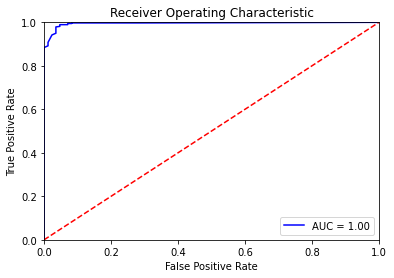

In [139]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = GBmodel.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

  # Chapter 5.5: KNN Neighbors Classifier
  
Usage of K Nearest Neighbors classifier for Coal vs Gas Prediction

In [140]:
from sklearn.neighbors import KNeighborsClassifier



In [141]:
n_neighbors = [3, 4, 5, 6]
for n_neighbor in n_neighbors:
    kn = KNeighborsClassifier(n_neighbors = n_neighbor)
    kn.fit(X_train, y_train)
    y_pred = kn.predict(X_test)
    print("KNN Neighbors: ", n_neighbor)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

KNN Neighbors:  3
              precision    recall  f1-score   support

           0       0.79      0.65      0.71        85
           1       0.92      0.96      0.94       380

    accuracy                           0.90       465
   macro avg       0.85      0.80      0.83       465
weighted avg       0.90      0.90      0.90       465

[[ 55  30]
 [ 15 365]]
KNN Neighbors:  4
              precision    recall  f1-score   support

           0       0.74      0.75      0.74        85
           1       0.94      0.94      0.94       380

    accuracy                           0.91       465
   macro avg       0.84      0.85      0.84       465
weighted avg       0.91      0.91      0.91       465

[[ 64  21]
 [ 23 357]]
KNN Neighbors:  5
              precision    recall  f1-score   support

           0       0.83      0.71      0.76        85
           1       0.94      0.97      0.95       380

    accuracy                           0.92       465
   macro avg       0.88     

In [142]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [143]:

print(metrics.accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9204301075268817
[[ 60  25]
 [ 12 368]]
              precision    recall  f1-score   support

           0       0.83      0.71      0.76        85
           1       0.94      0.97      0.95       380

    accuracy                           0.92       465
   macro avg       0.88      0.84      0.86       465
weighted avg       0.92      0.92      0.92       465



# Conclusion

This project was for the purpose of getting practice using all the different kinds of supervised models, testing them in different ways, and doing hyperparameter tuning.  I believe that I have successfully done this.  If I was going to recommend the best continuous predictive model to predict CO2 emissions for a coal plant, the multiple regression model 4 is what I would recommend.  Using BTU, Fuel, Source, and Plant Annual Net MWh Generation, I was able to produce a model that has an R squared value of .997, which is extremely accurate and is predicting CO2 results very effectively.

If I was going to recommend a classification model to most accurately predict which plants are Coal vs Gas given emissions of CH4 and CO2, at first it seemed like the original logistic regression that I produced was the most accurate.  Then I ran the Random Forest Model, however, and I was able to get a even better result.

The Random Foresst was better than the KNeighbors Model, Decision Tree models, and even the Gradient Boosting Model.  It produced an accuracy score of .996, and had very high precision and recall scores.  In  the confusion matrix, there were only 3 False Positives and there were no False Negatives in the classification of almost 400 samples.  I think all of the results that I gained from this analysis were logical and more or less expected, but I'm glad to have done all of this work in order to gain a better understanding of how to apply all of these models.


# Best Accuracy Scores:  

Logistic Regression:  0.992; Random Forest:  .996;  Decision Tree (Max Dept 3 and Gini Impurity): 0.994;  Gradient Boosting:  0.983;  K_neighbors:  0.920